# COMP257 Project 
##### Friday 1pm Group D  #####

## Predicting Formula 1 Drivers Salary based on pervious years performance

### Project Summary

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/F1.svg/799px-F1.svg.png" width=800 />

Formula 1 also know as F1, is one of the most elite sports in the world. The first F1 season was held in 1950 which means the sport has a legacy of over half a century. In 1950 there were a total of 7 races that made up the season and now in 21 the competition has expanded globally to 21 races.

We will be closely monitoring how factors such as driver age, number of world championships, pole positions and race wins will ultimately affect the drivers salary in the coming year.

### Project Goal
- Find race factors that most impact a drivers salary.
- Model previous F1 driver salaries.
- Predict 2019 driver salaries based on drivers' previous performance.

### Data Sources Summary
#### Driver Salary Data
Our data has been collected from various sources including outlets such as Forbes, the BBC, Crash.net (one of the oldest motorsport website in the world) and other sources. Most annual wages are estimated as drivers will received a higher bonus – if they perform above expectations.

#### Ergast Developer API
> The Ergast Developer API is an experimental web service which provides a historical record of motor racing data for non-commercial purposes.

> The API provides data for the Formula One series, from the beginning of the world championships in 1950.

*[Ergast Developer API](http://ergast.com/mrd/?fbclid=IwAR1giD7DxhujDLdjom8lL1WDPRCjpK2LVBegBVZ8NldsKuaTjnY1ndtZI_I)*

We will be using this data as our main source for each drivers season and race data to compare against their salaries for each season. The website also provides a direct dump of the data in CSV or MySQL format. We will be downloading this data as a CSV and then using pandas to transform it into a format we like.

### Data Manipulation Processes
#### Ergast Data Manipulation
As this data came as a database in CSV format that was heavily normalised, it needed to be transformed into a format where it was more accessible and usable for us.

To start I had to filter the data down so that we only had the 2013-2018 relevant data, This was done by:
1. filtering down to the races that happened in this time period.
2. Finding the results, lap times, pit stops, etc for those races.
3. Finding the drivers and constructors that competed in those races from the results of those races.
4. Finding which circuits *(tracks)* that those races took place on.

We will then need to match the data from the Ergast DB to our salary data that we have scraped from various websites, this will be done by matching the salary data onto the driverId's provided by Ergast.

Finally once we have the data we need, we can use it to get a range of predictors and features about each driver and their performance through the years.

*If you would like to see this process check out [Data Manipulation Process.ipynb](https://github.com/MQCOMP257/data-science-project-comp_pract_02-fri-1pm-_group-d/blob/master/Data%20Manipulation%20Process.ipynb)*



### Data Analysis Techniques
- Exploratary Data Analysis (EDA)
- Correlation Matrix
- Recursive Feature Elimination
- Linear and multiple regression
- K Nearest Neighbor
- Clustering



#### Exploratary Data Analysis (EDA)

In [1]:
# import all necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

#### Load the data

In [2]:
data_2018 = pd.read_csv('data/2018_Data.csv', encoding='latin-1')
data_2018

,Driver Name,Salary,Team,Driver Status,Age,Number of World Championships,Number of Pole Positions,Number of Race Wins,Number of Podiums,Number of DNF,Number of DSQ,Number of DNS,WD,Average Grid Position,Average Finish Position,Lead Lap Finish,Points,Number of Fastest Laps,Rookie Status,Pay Driver?
0,Sebastian Vettel,60000000,Ferrari,0,31,4,5,5,12,1,0,0,0,2.9,3.9,20,320,3,0,0
1,Lewis Hamiton,50000000,Mercedes,0,33,4,11,11,17,1,0,0,0,2.7,2.6,20,408,3,0,0
2,Kimi Räikkönen,40000000,Ferrari,1,38,1,1,1,12,4,0,0,0,3.8,6.0,17,251,1,0,0
3,Fernando Alonso,30000000,McLaren F1 Team,0,37,2,0,0,0,8,0,0,0,13.2,12.8,5,50,0,0,0
4,Valtteri Bottas,12000000,Mercedes,1,29,0,2,0,8,2,0,0,0,4.0,5.1,18,247,7,0,0
5,Max Verstappen,10000000,Red Bull Racing,0,20,0,2,2,11,4,0,0,0,7.1,6.1,17,249,2,0,0
6,Stoffel Vandoorne,7000000,McLaren F1 Team,1,26,0,0,0,0,3,0,0,0,15.8,12.9,5,12,0,0,0
7,Daniel Ricciardo,6000000,Red Bull Racing,1,29,0,1,2,2,8,0,0,0,8.2,9.3,13,170,4,0,0
8,Nico Hülkenberg,5500000,Renault F1 Team,0,31,0,0,0,0,7,0,0,0,11.2,11.9,8,69,0,0,0
9,Sergio Pérez,5000000,Force India,0,28,0,0,0,1,2,0,0,0,11.1,10.6,11,62,0,0,1


#### Remove spaces within the dataset. 

In [4]:
data_2018.describe()
headers = data_2018.columns
new_headers = []

for header in headers:
    new_headers.append(header.strip())
    
data_2018.columns = new_headers


#### Data Dictionary 
 - Driver Name: Name of the driver. There were 20 drivers in the F1 2018 season.
 - Salary - Driver's Salary in US Dollars (USD).
     - Note: Some drivers are paid drivers (which means that, instead of being paid by the owner of his car, drives for free and brings with him either personal sponsorship or personal or family funding to finance the team's operations).
 - Team: Driver's Team. There were 10 teams competing in 2018. 
 - Driver Status. Each driver will have a driver status within his team. 
     - Note: The first driver (coded as 0) will usually have the latesst resources (such as new parts), technical development and he will be the priority of the team. Nonetheless, some teams do not implement such system.
 - Age: The age of the driver. 
 - Number of World Championships: Each year the driver with the most championship points will be winning the 'World Champtionship'. 
 - Number of Pole Positions:  Pole position is the position at the inside of the front row at the start of a racing event. This position is typically given to the car and driver with the best qualifying time in the trials before the race (the leader in the starting grid). This number-one qualifying driver is referred to as the pole sitter.
 - Number of Race Wins: The number of times the driver has won the race. There were 21 races in 2018 season. 
 - Number of Podiums: Podiums refers to whether the driver has finished within the top 3 positions in the race. 
 - Number of DNF (Did Not Finish): The number of times that driver does not finish a race. This can due mechnical failture, the driver crashed his cars or other reasons. 
 - Number of DSQ (Disqualified): The number of times a driver gets disqualified as he (or his team) breach the rules. 
 - Number of DNS (Did Not Start): The number of times that a driver did not start a race, this can due illness or the mechanics are not able to fix the car due to eariler crash. 
 - WD (Withdrawn): The number of times a driver withdraw from a race. 
 - Average Grid Position: The average starting position of each of the drivers. 
 - Average Finish Position: The average finish position of each of the drivers. 
 - Lead Lap Finish. 
 - Points: Number of points that a driver scored in the 2018 F1 season. 
 - Number of Fastest Laps: The number of times a driver sets the quickest lap run during a race.
 - Rookie Status ('Yes' is coded 1, while 'No'is coded 0). Rookie driver refers to the fact a driver is starting his first Formula 1 season. 
 - Pay Driver: As mentioned above. 

#### Check Missing Data
#### Firstly, we should have a look whether the data is completed or not. Because the missing value will have an adverse impact on the building of regression model.

In [3]:
null_values_col = data_2018.isnull().sum() 
null_values_col = null_values_col[null_values_col != 0].sort_values(ascending = False).reset_index() 
null_values_col.columns = ["variable", "number of missing"] 
null_values_col.head()

,variable,number of missing


There are no missing values.

#### Descriptive Statistics

In [16]:
data_2018.describe()

,Salary,Driver Status,Age,Number of World Championships,Number of Pole Positions,Number of Race Wins,Number of Podiums,Number of DNF,Number of DSQ,Number of DNS,WD,Average Grid Position,Average Finish Position,Lead Lap Finish,Points,Number of Fastest Laps,Rookie Status,Pay Driver?
count,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.0,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.202000e+07,0.400000,27.100000,0.550000,1.100000,1.050000,3.150000,4.250000,0.150000,0.0,0.0,10.500000,10.51500,9.350000,106.050000,1.050000,0.100000,0.250000
std,1.796935e+07,0.502625,5.543132,1.276302,2.633789,2.645254,5.470254,2.244877,0.366348,0.0,0.0,4.512672,3.78199,6.080815,121.893601,1.877148,0.307794,0.444262
min,1.500000e+05,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,2.700000,2.60000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,9.375000e+05,0.000000,22.750000,0.000000,0.000000,0.000000,0.000000,2.750000,0.000000,0.0,0.0,7.925000,8.50000,4.750000,24.750000,0.000000,0.000000,0.000000
50%,4.725000e+06,0.000000,27.500000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.0,0.0,10.700000,11.75000,7.500000,51.500000,0.000000,0.000000,0.000000
75%,1.050000e+07,1.000000,31.000000,0.000000,1.000000,0.250000,3.500000,6.000000,0.000000,0.0,0.0,14.125000,12.90000,14.000000,189.250000,1.250000,0.000000,0.250000
max,6.000000e+07,1.000000,38.000000,4.000000,11.000000,11.000000,17.000000,8.000000,1.000000,0.0,0.0,16.500000,15.50000,20.000000,408.000000,7.000000,1.000000,1.000000


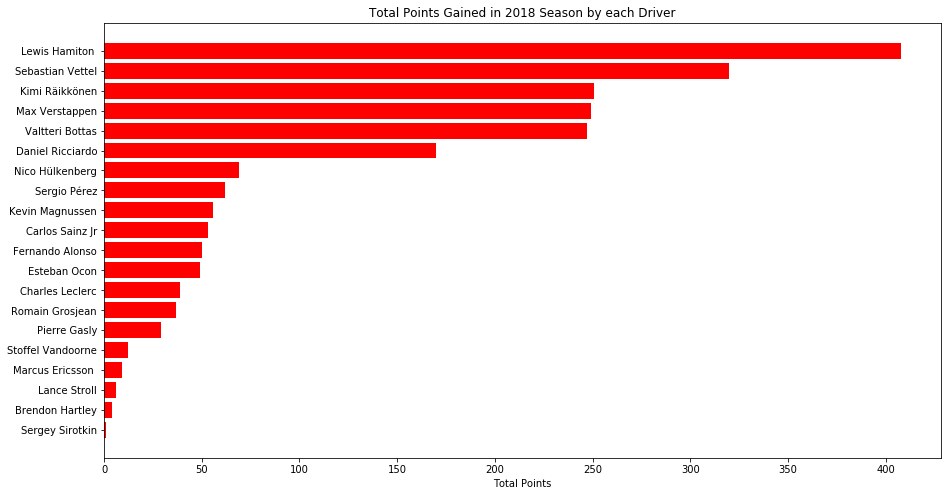

In [35]:
# order points in an ascending order
driver_points = data_2018[['Driver Name', 'Points']].sort_values(['Points'], ascending=True)

# bar chart of total points gained by each driver
plt.figure(figsize=(15,8))
plt.barh(driver_points['Driver Name'], driver_points['Points'], color='red')
plt.title('Total Points Gained in 2018 Season by each Driver')
plt.xlabel('Total Points')
plt.show()

The top 6 drivers gained significantly more point in 2018 season compared to the other drivers. It seems these top drivers dominated this season.

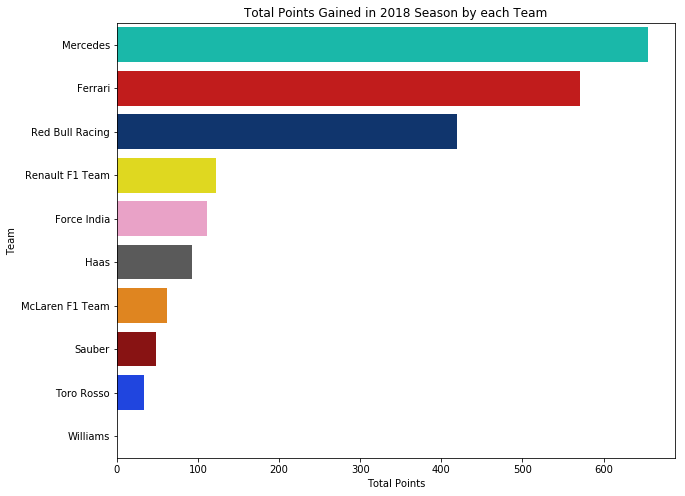

In [36]:
# points are grouped and sorted
team_points = data_2018[['Team', 'Points']].sort_values(['Points'], ascending=True)
team_points = team_points.groupby(['Team']).sum()
team_points = team_points.sort_values(['Points'], ascending=False)

# bar chart of total points gained by each team
team_colours = ["#00D2BE", 
                "#DC0000", 
                "#00327D", 
                "#FFF500", 
                "#F596C8", 
                "#5A5A5A", 
                "#FF8700",
                "#9B0000", 
                "#0032FF", 
                "#FFFFFF"]

plt.figure(figsize=(10,8))
ax = sns.barplot(y = team_points.index, 
                 x = team_points["Points"], 
                 palette=sns.color_palette(team_colours))
ax.set_title('Total Points Gained in 2018 Season by each Team')
ax.set_xlabel('Total Points')
plt.show()

Mercedes team gained the most amount of points, over 400 points, followed by Ferrari and Red Bull Racing. Rest of the teams did not perform as well as the top 3.

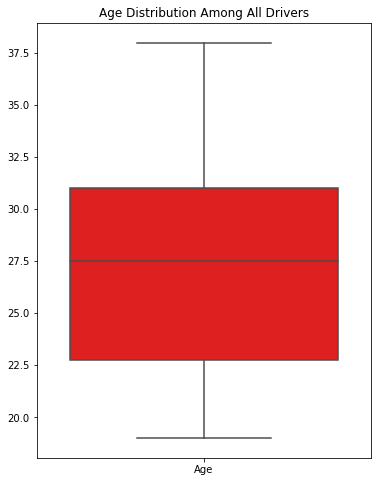

In [37]:
# boxplot of age
plt.figure(figsize=(6, 8))
sns.boxplot(data=data_2018[['Age']], color = 'red')
plt.title('Age Distribution Among All Drivers')
plt.show()

The median age among all drivers is 27.5 years. Age ranges from 19 to 38 years which suggests that drivers only race up to certain age.

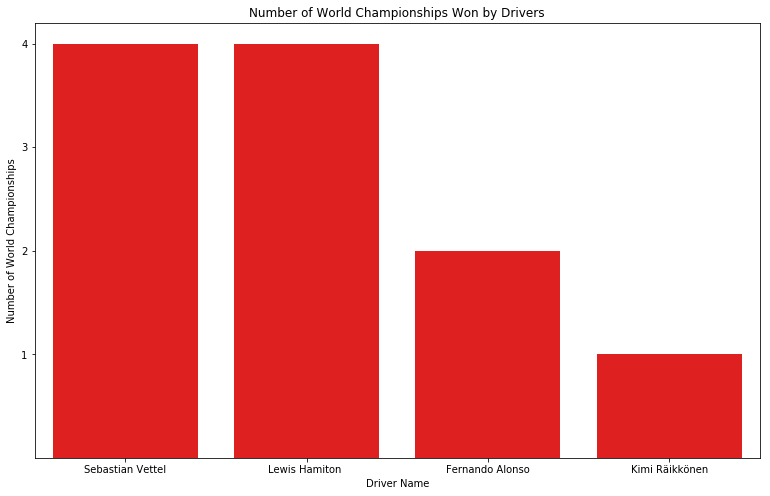

In [42]:
# select drivers who won at least one world championship & order them
top_drivers = data_2018[data_2018['Number of World Championships'] > 0].sort_values(['Number of World Championships'], ascending=False)

# visualise top drivers in a bar chart
plt.figure(figsize=(13,8))
ax = sns.barplot(top_drivers['Driver Name'], top_drivers['Number of World Championships'], color='red')
ax.set_title('Number of World Championships Won by Drivers')
ax.set_yticks(list(range(1,5)))
plt.show()

Vettel and Hamiton won 4 world championships, Alonso won 2, and Raikkonen won only one in their career. While, other drivers did not win any world championships.

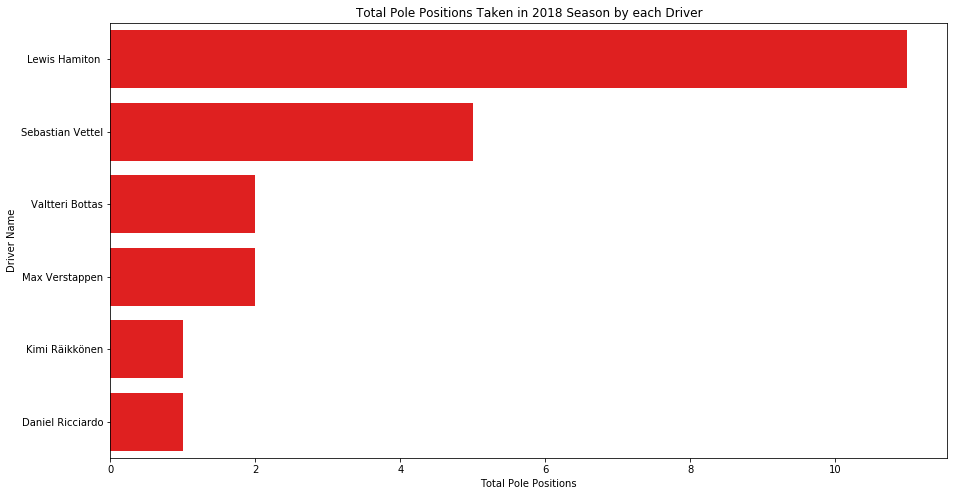

In [48]:
driver_poles = data_2018[['Driver Name', 'Number of Pole Positions']].sort_values(['Number of Pole Positions'], ascending=False)
driver_poles = driver_poles[driver_poles["Number of Pole Positions"] > 0] 

# bar chart of total points gained by each driver
plt.figure(figsize=(15,8))
ax = sns.barplot(y = driver_poles['Driver Name'], x = driver_poles['Number of Pole Positions'], color='RED')
ax.set_title('Total Pole Positions Taken in 2018 Season by each Driver')
ax.set_xlabel('Total Pole Positions')
plt.show()

It appears that there are only 6 drivers managed to take pole positions in F1 2018. Namely, these drivers are from Mercedes, Ferrari and Red Bull. Given the fact that, these are the most dominant teams in F1 therfore it is valid.   

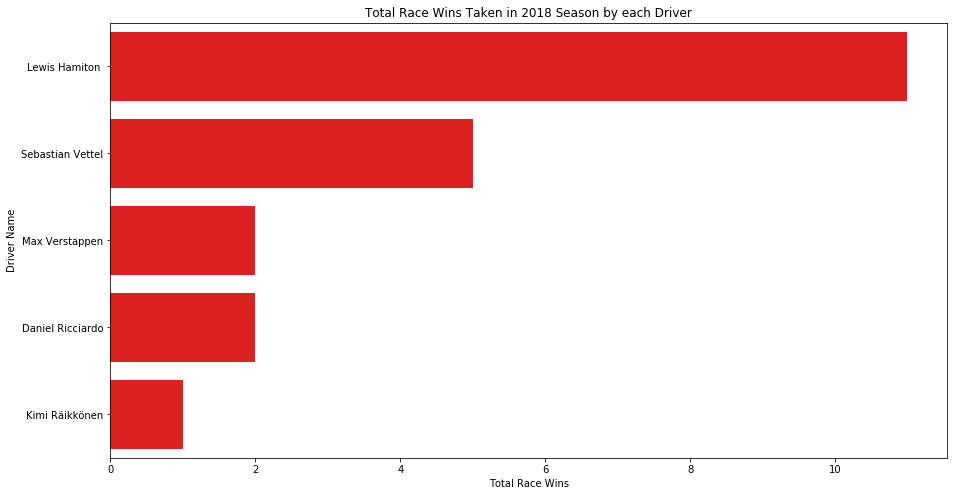

In [56]:
driver_wins = data_2018[['Driver Name', 'Number of Race Wins']].sort_values(['Number of Race Wins'], ascending=False)
driver_wins = driver_wins[driver_wins["Number of Race Wins"] > 0]

# bar chart of total points gained by each driver
plt.figure(figsize=(15,8))
ax = sns.barplot(y = driver_wins['Driver Name'], x = driver_wins['Number of Race Wins'], color='RED')
plt.title('Total Race Wins Taken in 2018 Season by each Driver')
plt.xlabel('Total Race Wins')
plt.show()

From the above graph, it shows that Hamiton has won the most races, which demostrates how dominant the Mercedas an car was in 2018. On the other hand, Vettel has won 5 and Räikkönen has won 1. Max Verstappen is the only non Mercedas or Ferrari driver which has won the race. 

#### Correlation between variables

In [57]:
data_2018.corr()

,Salary,Driver Status,Age,Number of World Championships,Number of Pole Positions,Number of Race Wins,Number of Podiums,Number of DNF,Number of DSQ,Number of DNS,WD,Average Grid Position,Average Finish Position,Lead Lap Finish,Points,Number of Fastest Laps,Rookie Status,Pay Driver?
Salary,1.000000,-0.156814,0.643115,0.935807,0.751272,0.741394,0.811580,-0.340209,-0.208751,NaN,NaN,-0.711697,-0.748174,0.705150,0.803036,0.387086,-0.217821,-0.339204
Driver Status,-0.156814,1.000000,-0.052894,-0.278951,-0.190837,-0.213761,-0.061255,0.186582,-0.057166,NaN,NaN,-0.095138,-0.039316,0.089546,-0.020102,0.200820,0.068041,-0.235702
Age,0.643115,-0.052894,1.000000,0.520014,0.312918,0.304741,0.381341,0.120543,-0.085529,NaN,NaN,-0.446270,-0.368375,0.329935,0.412447,0.227111,-0.345501,-0.224410
Number of World Championships,0.935807,-0.278951,0.520014,1.000000,0.828262,0.833246,0.703720,-0.344430,-0.185731,NaN,NaN,-0.574791,-0.633121,0.570670,0.709245,0.295472,-0.147376,-0.255262
Number of Pole Positions,0.751272,-0.190837,0.312918,0.828262,1.000000,0.981312,0.839110,-0.476241,-0.180006,NaN,NaN,-0.675750,-0.768949,0.704248,0.847225,0.509921,-0.142833,-0.247394
Number of Race Wins,0.741394,-0.213761,0.304741,0.833246,0.981312,1.000000,0.796009,-0.401056,-0.171079,NaN,NaN,-0.625645,-0.715033,0.656533,0.807977,0.412846,-0.135750,-0.235125
Number of Podiums,0.811580,-0.061255,0.381341,0.703720,0.839110,0.796009,1.000000,-0.483240,-0.248186,NaN,NaN,-0.847718,-0.921809,0.890732,0.964864,0.609171,-0.196934,-0.319442
Number of DNF,-0.340209,0.186582,0.120543,-0.344430,-0.476241,-0.401056,-0.483240,1.000000,0.143994,NaN,NaN,0.342378,0.481830,-0.400019,-0.410697,-0.277898,0.038086,-0.118740
Number of DSQ,-0.208751,-0.057166,-0.085529,-0.185731,-0.180006,-0.171079,-0.248186,0.143994,1.000000,NaN,NaN,-0.031836,0.150238,-0.237442,-0.207613,-0.164548,-0.140028,-0.242536
Number of DNS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Comments: 
Relatively high correlation can be observed between 'Salary in USD' and the following variables:
* Age
* Number of World Championships
* Number of Pole Positions
* Number of Race Wins
* Number of Podiums
* Average Grid Position
* Average Finish Position
* Points